# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 2

In [113]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [114]:
# Dataset
clean_data_path = "dataset/autos/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [115]:
plt.get_backend()

'module://ipykernel.pylab.backend_inline'

In [116]:
list(df)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'postalCode',
 'lastSeen',
 'yearOfCreation',
 'yearCrawled',
 'monthOfCreation',
 'monthCrawled',
 'NoOfDaysOnline',
 'NoOfHrsOnline',
 'yearsOld',
 'monthsOld']

## Número de veículos pertencentes a cada marca

In [117]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*. The return value is a
    tuple (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*,
    [*patches0*, *patches1*,...]) if the input contains multiple
    data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported at present.
    
    Parameters
    ----------
    x : (n,) array or sequence of (n,) arrays
        Input values, this takes either a single array or a sequence of


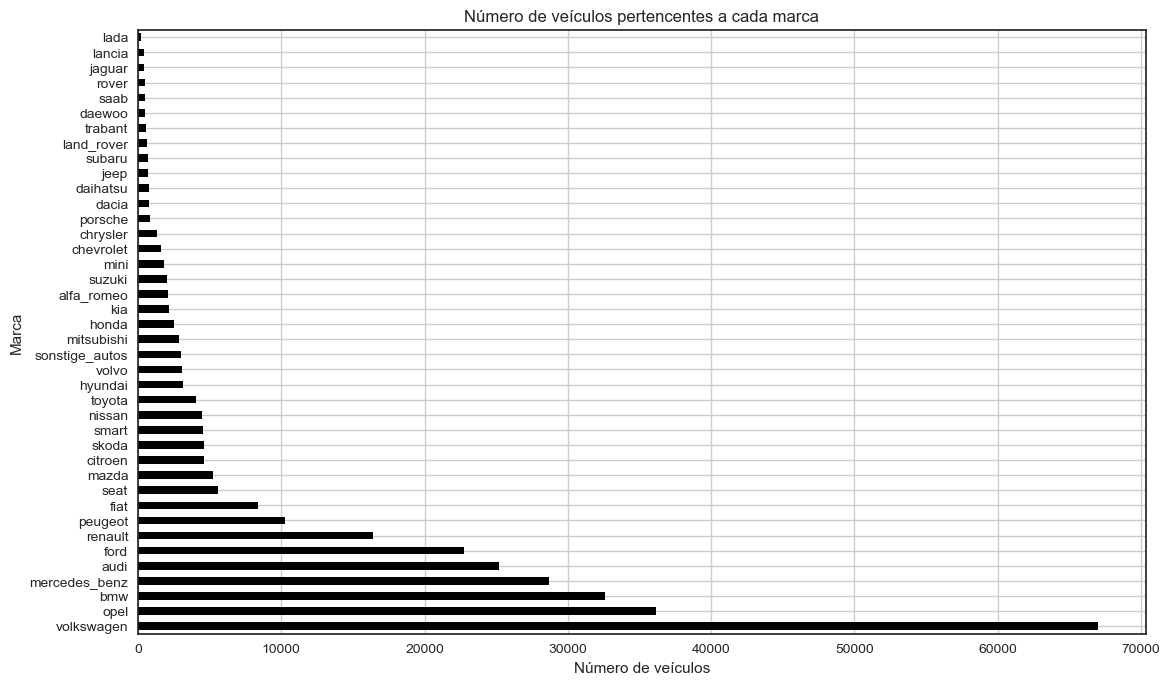

In [118]:
# Crie um Plot que mostre o número de veículos pertencentes a cada marca
g , ax = plt.subplots(figsize=(13,8), dpi = 100)
df['brand'].value_counts().plot(kind='barh', colormap='bone')
plt.grid()
plt.xlabel('Número de veículos')
plt.ylabel('Marca')
plt.title('Número de veículos pertencentes a cada marca')
plt.show()

In [119]:
# Salvando o plot
g.savefig(("plots/Analise2/brand-vehicleCount.png"))

In [120]:
help(sns.factorplot)

Help on function factorplot in module seaborn.categorical:

factorplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x00000261827BF268>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='point', size=4, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Draw a categorical plot onto a FacetGrid.
    
    The default plot that is shown is a point plot, but other seaborn
    categorical plots can be chosen with the ``kind`` parameter, including
    box plots, violin plots, bar plots, or strip plots.
    
    It is important to choose how variables get mapped to the plot structure
    such that the most important comparisons are easiest to make. As a general
    rule, it is easier to compare positions that are closer together, so the
    ``hue`` variable should be used for the most imp

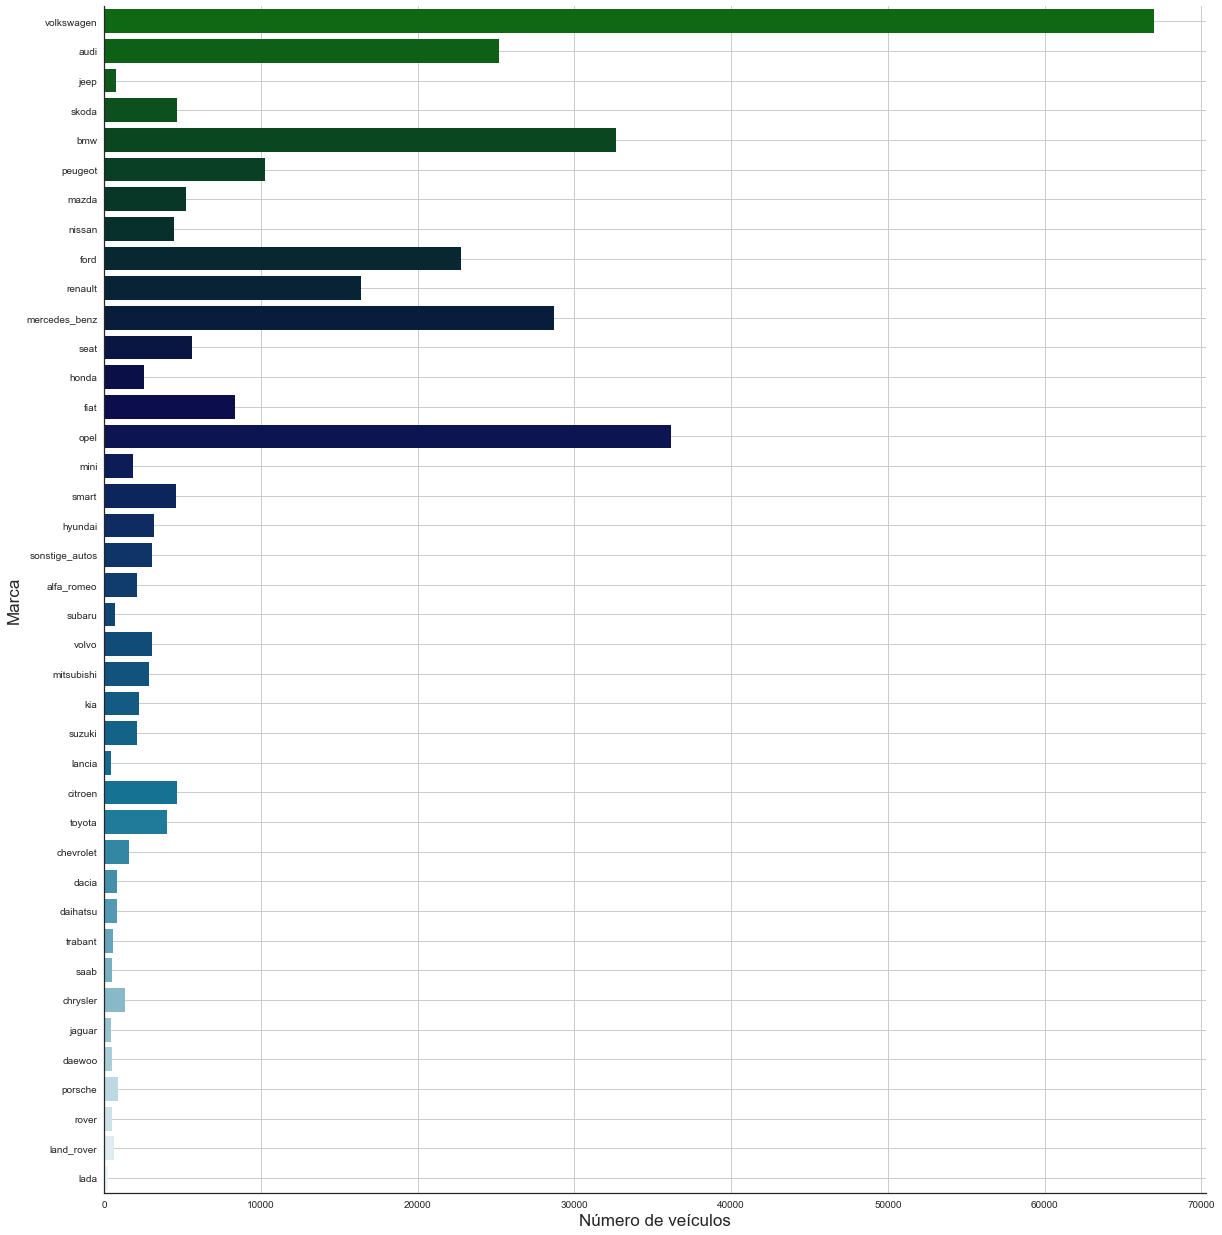

In [121]:
g2 = sns.factorplot(data=df, y='brand', kind='count', palette='ocean', size = 17)
sns.set(font_scale=1)
plt.grid()
plt.xlabel('Número de veículos', size=17)
plt.ylabel('Marca', size = 17)
plt.show()

## Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de câmbio

In [214]:
list(np.arange(0,27,1))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

In [246]:
# Crie um Plot com o Preço médio dos veículos com base no tipo de veículo, bem como no tipo de caixa de sns.
aux = df.groupby(['vehicleType', 'gearbox']).price.mean()
df2 = pd.DataFrame(aux)
df2 = df2.reset_index()
df2

,vehicleType,gearbox,price
0,Other,Unspecified,637.746376
1,Other,automatik,1216.928197
2,Other,manuell,966.845311
3,andere,Unspecified,1234.450893
4,andere,automatik,2901.823293
5,andere,manuell,2456.987680
6,bus,Unspecified,3483.163660
7,bus,automatik,5719.686344
8,bus,manuell,4547.567803
9,cabrio,Unspecified,4758.811679


In [273]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x00000261827BF268>, ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)
    Show point estimates and confidence intervals as rectangular bars.
    
    A bar plot represents an estimate of central tendency for a numeric
    variable with the height of each rectangle and provides some indication of
    the uncertainty around that estimate using error bars. Bar plots include 0
    in the quantitative axis range, and they are a good choice when 0 is a
    meaningful value for the quantitative variable, and you want to make
    comparisons against it.
    
    For datasets where 0 is not a meaningful value, a point plot will allow you
    to focus on differences between levels of one or more categorical
    variables.
    


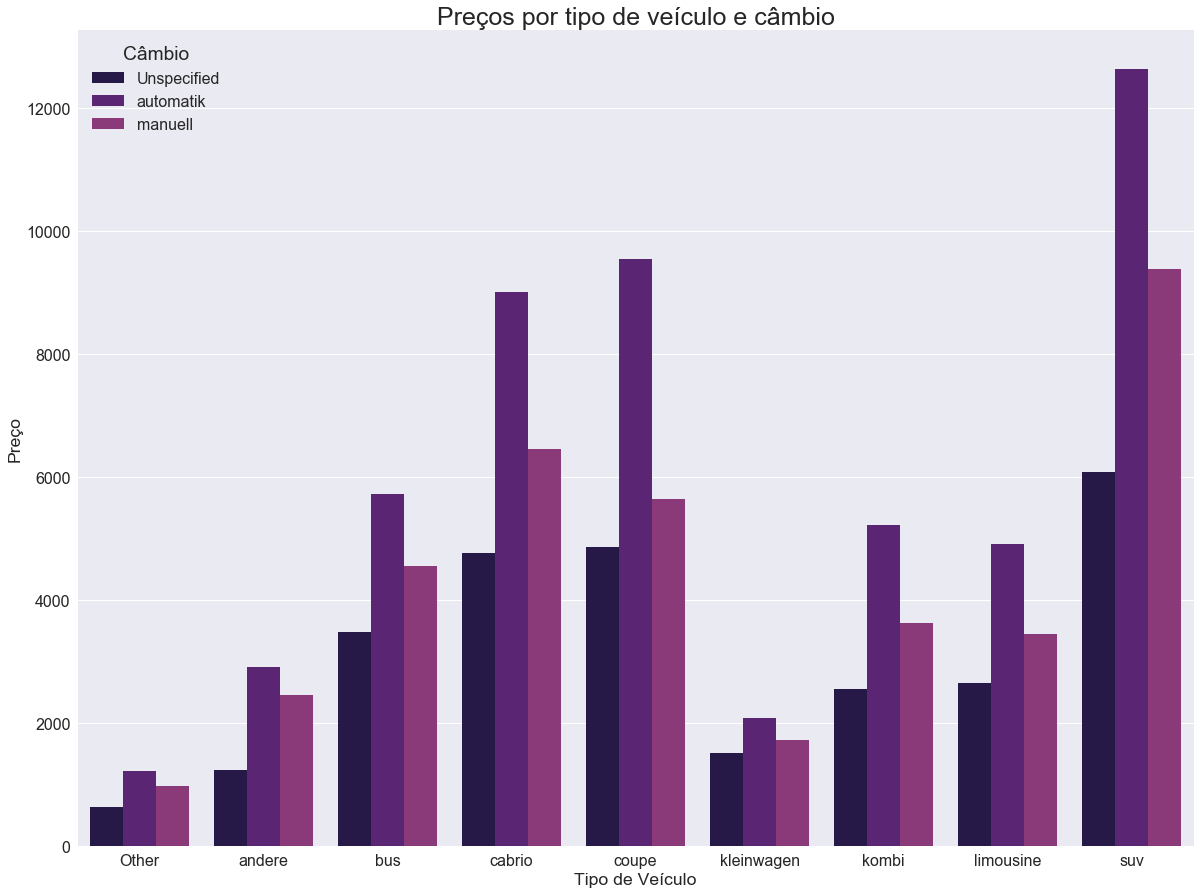

In [296]:
f, ax = plt.subplots(figsize=(20,15))
sns.set(palette='magma',font_scale=1.6)
sns.barplot(data=df2,x='vehicleType',y='price',errwidth=0, hue='gearbox')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Preço')
plt.title('Preços por tipo de veículo e câmbio', fontsize=25)
plt.legend(title='Câmbio')
plt.show()

In [297]:
# Salvando o plot
f.savefig("plots/Analise2/vehicletype-gearbox-price.png")

Conheça a Formação Cientista de Dados, um programa completo, 100% online e 100% em português, com 340 horas, mais de 1.200 aulas em vídeos e 26 projetos, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de análise de dados. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-cientista-de-dados

# Fim

### Obrigado - Data Science Academy - <a href=http://facebook.com/dsacademy>facebook.com/dsacademybr</a>